# Mica detection

## Color image


In [50]:
color_0_path = '../data/0_color.jpg'

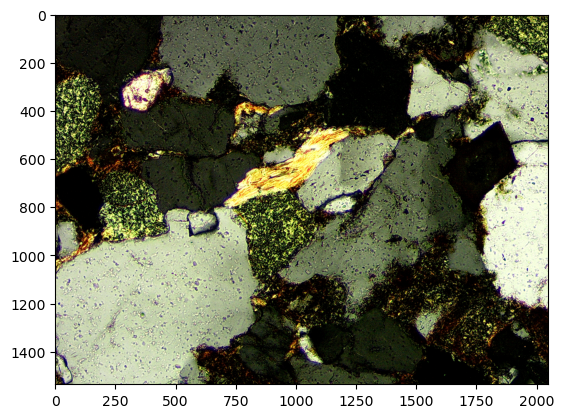

In [51]:
from skimage.io import imread
import matplotlib.pyplot as plt


image = imread(color_0_path)
plt.imshow(image)

### Thresholds

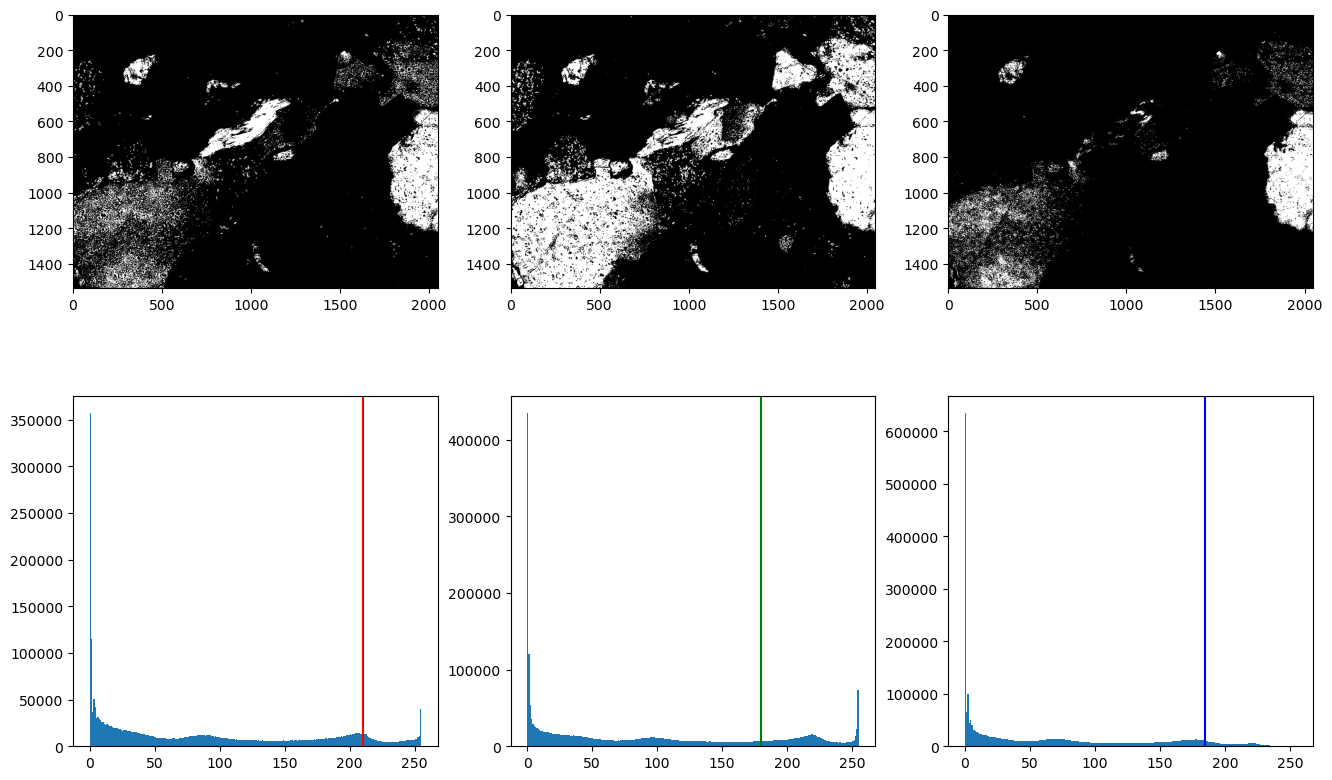

In [111]:
import numpy as np

image_r, image_g, image_b = image[:, :, 0], image[:, :, 1], image[:, :, 2]
thresh_r, thresh_g, thresh_b = 210, 180, 185

binary_r = image_r > thresh_r
binary_g = image_g > thresh_g
binary_b = image_b > thresh_b

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

axes[0, 0].imshow(binary_r, cmap='gray')
axes[0, 1].imshow(binary_g, cmap='gray')
axes[0, 2].imshow(binary_b, cmap='gray')

axes[1, 0].hist(image_r.ravel(), bins=256)
axes[1, 1].hist(image_g.ravel(), bins=256)
axes[1, 2].hist(image_b.ravel(), bins=256)

axes[1, 0].axvline(thresh_r, c='r')
axes[1, 1].axvline(thresh_g, c='g')
axes[1, 2].axvline(thresh_b, c='b')


### Binarization

In [112]:
from skimage.morphology import binary_erosion, binary_closing, disk, remove_small_holes, binary_opening, binary_dilation, remove_small_objects
from skimage.segmentation import clear_border

binary_r_processed = binary_erosion(binary_r)
binary_r_processed = binary_closing(binary_r_processed, disk(5))
binary_r_processed = remove_small_holes(binary_r_processed, 2048)
binary_r_processed = binary_opening(binary_r_processed, disk(8))
binary_r_processed = binary_dilation(binary_r_processed, disk(6))
binary_r_processed = clear_border(binary_r_processed)
binary_r_processed = remove_small_objects(binary_r_processed, 10000)
binary_r_processed = binary_closing(binary_r_processed, disk(16))

### Result

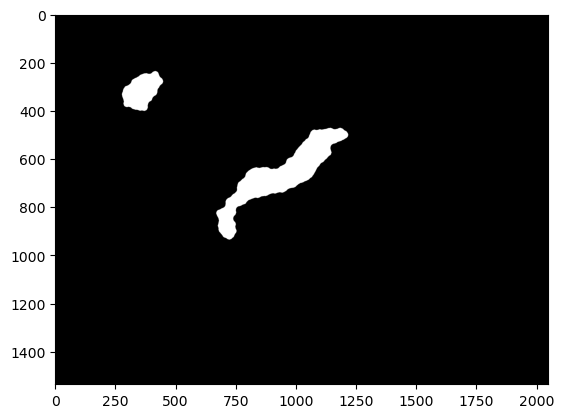

In [113]:
plt.imshow(binary_r_processed, cmap="gray")

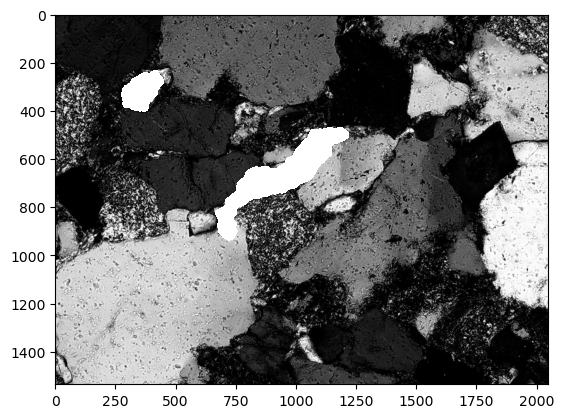

In [141]:
from skimage.color import rgb2gray


plt.imshow(np.ma.array(rgb2gray(image), mask=binary_r_processed), cmap='gray')

In [143]:
mica_pixels = np.sum(binary_r_processed)
mica_area = mica_pixels / (182 / 0.05) ** 2

In [144]:
print(f'Number of pixels containing mica: {mica_pixels} px')
print(f'Mica area:                        {mica_area} mm^2')

Number of pixels containing mica: 83510 px
Mica area:                        0.006302831783601014 mm^2
